In [19]:
import numpy as np
import scipy as sp
import os 
import sys
import importlib
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
util_path = 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils' if 'C:' in os.getcwd() else './myutils'
sys.path.append(util_path)
import my_file_utils as mfileu
import my_data_process_utils as mdpu
import my_classification_utils as mcu
#importlib.reload()

In [39]:
data = mfileu.read_file('data', 'lab_data_steven_right.pkl')
annots = mfileu.read_file('data', 'lab_annots_steven_right.pkl')
all_ssilv = mfileu.read_file('generated_for_result', 'all_ssilv.pkl')
all_proba = mfileu.read_file('generated_for_result', 'all_proba.pkl')
all_pct_proba = mfileu.read_file('generated_for_result', 'all_pct_proba.pkl')
all_bites = mfileu.read_file('generated_for_result', 'all_bites.pkl')

all_ssilv_lab = all_ssilv["lab"]
all_proba_lab = all_proba["lab"]
all_pct_proba_lab = all_pct_proba["lab"]
all_bites_lab = all_bites["lab"]

In [40]:
episodes = mfileu.read_file('data', 'lab_episodes_steven_right.pkl')
cond = episodes[:,-1]>=3
episodes = episodes[cond, :]
print("Lab episode count: ", len(episodes))

Lab episode count:  32


In [41]:
############# Sessionwise Bite/hour ###############

Total :  1578 1332 246


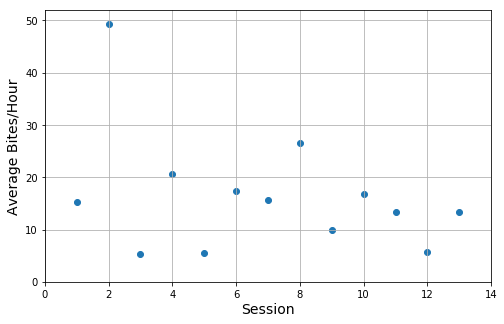

In [42]:
res = []
i, annot_count, bite_count, sip_count = 0, 0, 0, 0

for subj in range(len(annots)):
    for sess in range(len(annots[subj])):
        dcount = len(data[subj][sess])
        a = annots[subj][sess]
        b = a[a[:, 2]==1, :]
        s = a[a[:, 2]==2, :]
        #print(subj, sess, dcount, len(a), len(b), len(s))
        annot_count += len(a)
        bite_count += len(b)
        sip_count += len(s)
        
        res.append([i+1, dcount/16/3600, len(b)])
        i+=1
print("Total : ", annot_count, bite_count, sip_count)
#print(res)
###############################
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)  

res = np.array(res)
x = res[:, 0]
y = res[:, 2]/res[:, 1]
#print(x)
#print(y)
ax.scatter(x, y)

plt.xlabel("Session", fontsize=14)        
plt.ylabel("Average Bites/Hour", fontsize=14)            
plt.xlim([0, 14])
plt.ylim([0, 52])
plt.grid(True)
plt.show()  

In [35]:
######### IEBR, OEBR (Proba) ##############

In [43]:
def get_results(all_bites):    
    pos, neg = 0, 0    
    for subj in range(len(annots)):
        for sess in range(len(annots[subj])):
            cond = (episodes[:,0]==subj) & (episodes[:,1]==sess)
            a = episodes[cond, 2:]
            
            bites = all_bites[subj][sess]            
            flags = np.zeros((len(bites, )))
            for i in range(len(a)):
                cond = (bites>=a[i, 0] ) & (bites<=a[i, 1])
                flags[cond] = 1
                
            p = np.sum(flags)
            pos += p
            neg += len(flags) - p
            
    return pos, neg

In [44]:
def plot_iebr_oebr(res_rf, res_our, xlabel):
    fig = plt.figure(figsize=(8,5))
    ax = plt.subplot(111)  

    r = res_rf
    ax.plot(r[:,0], 100*r[:,1]/bite_count, label='IEBR (RF)', color='green', linestyle='--')
    ax.plot(r[:,0], 100*r[:,2]/bite_count, label='OEBR (RF)', color='red', linestyle='--')
    #ax.plot(r[:,0], 100*r[:,3]/bite_count, label='FNR (RF)', color='black', linestyle='--')

    r = res_our
    ax.plot(r[:,0], 100*r[:,1]/bite_count, label='IEBR (ConvBLSTM)', color='green')
    ax.plot(r[:,0], 100*r[:,2]/bite_count, label='OEBR (ConvBLSTM)', color='red')
    #ax.plot(r[:,0], 100*r[:,3]/bite_count, label='FNR (ConvBLSTM)', color='black')

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
              ncol=2, fancybox=True, shadow=True, fontsize=14)

    plt.xlabel(xlabel, fontsize=14)        
    plt.ylabel("Rate (%)", fontsize=14)            
    #plt.legend()
    plt.grid(True)
    plt.show() 

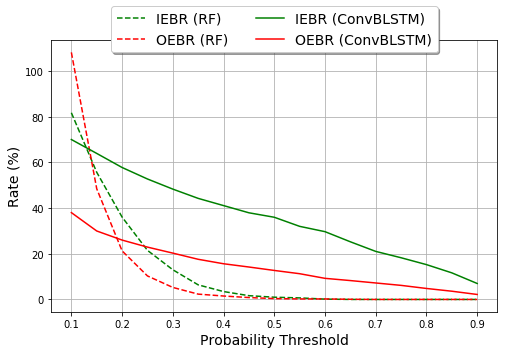

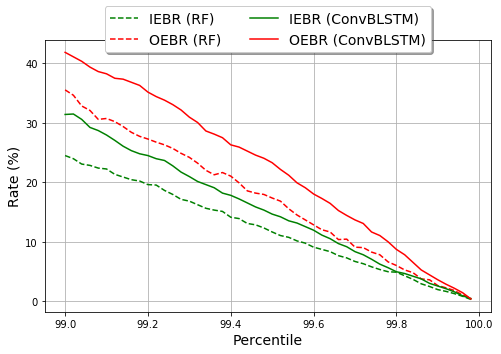

In [45]:
res_rf, res_our  = [], []
for p in range(10, 95, 5):
    proba = p/100    
    pos, neg = get_results(all_bites_lab["RF"]["proba"][proba])
    res_rf.append([proba, pos, neg])    
    
    pos, neg = get_results(all_bites_lab["our"]["proba"][proba])
    res_our.append([proba, pos, neg])
    
res_rf, res_our = np.array(res_rf), np.array(res_our)
plot_iebr_oebr(res_rf, res_our, "Probability Threshold")


res_rf, res_our  = [], []
for p in range(9900, 10000, 2):
    percentile = p/100    
    pos, neg = get_results(all_bites_lab["RF"]["percentile_offline"][percentile])
    res_rf.append([percentile, pos, neg])    
    
    pos, neg = get_results(all_bites_lab["our"]["percentile_offline"][percentile])
    res_our.append([percentile, pos, neg])
    
res_rf, res_our = np.array(res_rf), np.array(res_our)
plot_iebr_oebr(res_rf, res_our, "Percentile")


In [ ]:
#################################################################

In [ ]:
########## precision, recall, F1-score of bites (Proba) ###########

In [ ]:
prf = all_bf_proba_rf
pour = all_bf_proba_our

res_rf = []
res_our = []
for p in range(1, 10):
    proba = p/10    
    tp = prf[proba]["bite"]["tp"]
    fp = prf[proba]["bite"]["fp"]
    fn = prf[proba]["bite"]["fn"]
    pr, rc, f1 = mcu.pr_rc_f1(tp, fp, fn)    
    res_rf.append([proba, tp, fp, fn, pr, rc, f1])
    
    tp = pour[proba]["bite"]["tp"]
    fp = pour[proba]["bite"]["fp"]
    fn = pour[proba]["bite"]["fn"]
    pr, rc, f1 = mcu.pr_rc_f1(tp, fp, fn)    
    res_our.append([proba, tp, fp, fn, pr, rc, f1])

res_rf, res_our = np.array(res_rf), np.array(res_our)
r = res_rf
for i in range(len(r)):
    x= r[i, :]
    print("{:.1f} : {:4d}, {:4d}, {:4d} : {:.4f}, {:.4f}, {:.4f}".format(x[0], int(x[1]), int(x[2]), int(x[3]), x[4], x[5], x[6]))

r = res_our
for i in range(len(r)):
    x= r[i, :]
    print("{:.1f} : {:4d}, {:4d}, {:4d} : {:.4f}, {:.4f}, {:.4f}".format(x[0], int(x[1]), int(x[2]), int(x[3]), x[4], x[5], x[6]))

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)  

r = res_rf
ax.plot(r[:,0], 100*r[:,1]/bite_count, label='TPR (RF)', color='green', linestyle='--')
ax.plot(r[:,0], 100*r[:,2]/bite_count, label='FPR (RF)', color='red', linestyle='--')
ax.plot(r[:,0], 100*r[:,3]/bite_count, label='FNR (RF)', color='black', linestyle='--')

r = res_our
ax.plot(r[:,0], 100*r[:,1]/bite_count, label='TPR (ConvBLSTM)', color='green')
ax.plot(r[:,0], 100*r[:,2]/bite_count, label='FPR (ConvBLSTM)', color='red')
ax.plot(r[:,0], 100*r[:,3]/bite_count, label='FNR (ConvBLSTM)', color='black')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=2, fancybox=True, shadow=True, fontsize=14)

plt.xlabel("Probablity Threshold", fontsize=14)        
plt.ylabel("Rate (%)", fontsize=14)            
#plt.legend()
plt.grid(True)
plt.show()  


In [ ]:
res_rf, res_our = np.array(res_rf), np.array(res_our)

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)  

r = res_rf
ax.plot(r[:,0], r[:,4], label='Precision (RF)', color='green', linestyle='--')
ax.plot(r[:,0], r[:,5], label='Recall (RF)', color='red', linestyle='--')
ax.plot(r[:,0], r[:,6], label='F1-Score (RF)', color='black', linestyle='--')

r = res_our
ax.plot(r[:,0], r[:,4], label='Precision (ConvBLSTM)', color='green')
ax.plot(r[:,0], r[:,5], label='Recall (ConvBLSTM)', color='red')
ax.plot(r[:,0], r[:,6], label='F1-Score (ConvBLSTM)', color='black')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=2, fancybox=True, shadow=True, fontsize=14)

plt.xlabel("Probablity Threshold", fontsize=14)        
plt.ylabel("Rate (%)", fontsize=14)            
#plt.legend()
plt.grid(True)
plt.show()  


In [ ]:
#################################################################
################## precision, recall, F1-score of bites (Percentile)

In [ ]:
prf = all_bf_percentile_rf
pour = all_bf_percentile_our

res_rf, res_our = [], []
for p in range(9800, 10000, 5):
    percentile = p/100    
    tp = prf[percentile]["bite_offline"]["tp"]
    fp = prf[percentile]["bite_offline"]["fp"]
    fn = prf[percentile]["bite_offline"]["fn"]
    pr, rc, f1 = mcu.pr_rc_f1(tp, fp, fn)    
    res_rf.append([percentile, tp, fp, fn, pr, rc, f1])
    
    tp = pour[percentile]["bite_offline"]["tp"]
    fp = pour[percentile]["bite_offline"]["fp"]
    fn = pour[percentile]["bite_offline"]["fn"]
    pr, rc, f1 = mcu.pr_rc_f1(tp, fp, fn)    
    res_our.append([percentile, tp, fp, fn, pr, rc, f1])

res_rf, res_our = np.array(res_rf), np.array(res_our)

'''
r = res_rf
for i in range(len(r)):
    x= r[i, :]
    print("{:.2f} : {:4d}, {:4d}, {:4d} : {:.4f}, {:.4f}, {:.4f}".format(x[0], int(x[1]), int(x[2]), int(x[3]), x[4], x[5], x[6]))

r = res_our
for i in range(len(r)):
    x= r[i, :]
    print("{:.2f} : {:4d}, {:4d}, {:4d} : {:.4f}, {:.4f}, {:.4f}".format(x[0], int(x[1]), int(x[2]), int(x[3]), x[4], x[5], x[6]))
'''

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)  

r = res_rf
ax.plot(r[:,0], 100*r[:,1]/bite_count, label='TPR (RF)', color='green', linestyle='--')
ax.plot(r[:,0], 100*r[:,2]/bite_count, label='FPR (RF)', color='red', linestyle='--')
ax.plot(r[:,0], 100*r[:,3]/bite_count, label='FNR (RF)', color='black', linestyle='--')

r = res_our
ax.plot(r[:,0], 100*r[:,1]/bite_count, label='TPR (ConvBLSTM)', color='green')
ax.plot(r[:,0], 100*r[:,2]/bite_count, label='FPR (ConvBLSTM)', color='red')
ax.plot(r[:,0], 100*r[:,3]/bite_count, label='FNR (ConvBLSTM)', color='black')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=2, fancybox=True, shadow=True, fontsize=14)

plt.xlabel("Percentile", fontsize=14)        
plt.ylabel("Rate (%)", fontsize=14)            
#plt.legend()
plt.grid(True)
plt.show()  


In [ ]:
res_rf, res_our = np.array(res_rf), np.array(res_our)

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)  

r = res_rf
ax.plot(r[:,0], r[:,4], label='Precision (RF)', color='green', linestyle='--')
ax.plot(r[:,0], r[:,5], label='Recall (RF)', color='red', linestyle='--')
ax.plot(r[:,0], r[:,6], label='F1-Score (RF)', color='black', linestyle='--')

r = res_our
ax.plot(r[:,0], r[:,4], label='Precision (ConvBLSTM)', color='green')
ax.plot(r[:,0], r[:,5], label='Recall (ConvBLSTM)', color='red')
ax.plot(r[:,0], r[:,6], label='F1-Score (ConvBLSTM)', color='black')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=2, fancybox=True, shadow=True, fontsize=14)

plt.xlabel("Percentile", fontsize=14)        
#plt.ylabel("Rate (%)", fontsize=14)            
#plt.legend()
plt.grid(True)
plt.show()  


In [ ]:
#############################################################
################### Check bites in and out of episodes

In [ ]:
def get_episodes(a):
    a = a[a[:, 2]==1, 0]    
    clusters = []
    si = 0
    for i in range(1, len(a)):
        if a[i]-a[i-1]>5*16*60:
            clusters.append([a[si], a[i-1], i-si])
            si = i
        
    clusters.append([a[si], a[i-1], i-si])
    return np.array(clusters).astype(float)

In [ ]:
b1 = all_bf_proba_rf[0.2]["bite"]["list"]
b2 = all_bf_proba_our[0.5]["bite"]["list"]

b11 = all_bf_percentile_rf[99.5]["bite_offline"]["list"]
b12 = all_bf_percentile_our[99.5]["bite_offline"]["list"]


In [ ]:
print(len(b11[-1][-1]), len(b12[-1][-1]))

In [ ]:
episodes = np.zeros((0, 5))
for subj in range(len(annots)):
    for sess in range(len(annots[subj])):
        a = annots[subj][sess]      
        t = a[:,0]/(16*60)
        b= a[:,2]
        
        c = get_episodes(a)
        ssc = mdpu.add_subj_sess_to_array(c, subj, sess)
        episodes = np.concatenate((episodes, ssc))
        c[:,0:2] = c[:,0:2]/16/60
        print("Episode count: ", len(c))
        print(c)
        
        
        fig = plt.figure(figsize=(18,6))
        ax = plt.subplot(111)  

        ax.scatter(t, b, marker='x')
        
        ax.scatter(b1[subj][sess]/16/60, np.zeros((len(b1[subj][sess], )))+1.1, marker='x' )
        ax.scatter(b2[subj][sess]/16/60, np.zeros((len(b2[subj][sess], )))+1.2, marker='x' )
        ax.scatter(b11[subj][sess]/16/60, np.zeros((len(b11[subj][sess], )))+1.3, marker='x' )
        ax.scatter(b12[subj][sess]/16/60, np.zeros((len(b12[subj][sess], )))+1.4, marker='x' )
        
        for i in range(len(c)):            
            ax.plot([c[i, 0], c[i, 1]] , [1.9, 1.9] , linewidth=5, color='blue')
            
        
        plt.title("Subj, sess: {}, {}  Bite, Sip:{}, {}".format(subj, sess, np.sum(b==1), np.sum(b==2)), fontsize=16)
        plt.xlabel("Time ", fontsize=16)        
        #plt.ylabel("Rate (%)", fontsize=16)            
        #plt.legend(fontsize=16)
        plt.xlim([0, 400])
        plt.grid(True)
        plt.show()

print(len(episodes), len(episodes)/13)
